<a href="https://colab.research.google.com/github/zhafts/Case-Study-2/blob/main/Case_Study_2_Kelompok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 2: Clustering**
# **Data Mining and Business Intelligence**



**Anggota Kelompok 1:**
1. Zhafirah Tsany (2006572951)
2. Galih Nur Kantaatmaja (2006571141)
3. Fadhilah Daffa Yoriko (2006571116)
4. Aditya Firmansyah (2006533143)
5. Reynee Joyvina Freeina Anthonia (2006485024)
6. Jasmine Husna Sanditya (2006571034)
7. Keisha Janita (2006571021)

In [76]:
import pandas as pd

In [77]:
import warnings; warnings.simplefilter('ignore')
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

# Input Data

In [78]:
try: # Running Locally, Read file excel xlsx
    df = pd.read_excel("data/Case-Study-02MixITup.xlsx", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/galihnurkanta/123123/main/Case-Study-02MixITup.xlsx
    df = pd.read_excel("data/Case-Study-02MixITup.xlsx",sheet_name='Data')

mkdir: cannot create directory ‘data’: File exists
--2022-10-07 08:47:01--  https://raw.githubusercontent.com/galihnurkanta/123123/main/Case-Study-02MixITup.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27864 (27K) [application/octet-stream]
Saving to: ‘data/Case-Study-02MixITup.xlsx.3’

Case-Study-02MixITu 100%[===================>]  27.21K  --.-KB/s    in 0s      

2022-10-07 08:47:01 (86.4 MB/s) - ‘data/Case-Study-02MixITup.xlsx.3’ saved [27864/27864]



In [79]:
#Cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         197 non-null    object 
 2   Umur                  200 non-null    int64  
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 15.8+ KB


# Cleaning Data


In [80]:
#Mengisi data NaN
#Pada kolom 'Jenis Kelamin' terdapat 4 data NaN, dengan pertimbangan NaN berjumlah di bawah 40% dari keseluruhan data, data NaN akan diisi dengan modus
import statistics

print(statistics.mode(df['Jenis Kelamin']))
print(statistics.mode(df['Promo']))
print(statistics.mode(df['Menikah']))

Wanita
1.0
1


In [81]:
df['Jenis Kelamin'].fillna('Wanita', inplace=True)
df['Promo'].fillna(1.0, inplace=True)
df['Menikah'].fillna(1, inplace=True)

In [82]:
#Karena terdapat missing value yang berbentuk '-'
#dilakukan replace pada kolom 'Jenis Kelamin' dan 'Menikah'

df['Jenis Kelamin'].replace(['-'], df['Jenis Kelamin'].mode()[0], inplace=True)
df['Menikah'].replace(['-'], df['Menikah'].mode()[0], inplace=True)

In [83]:
df['Umur'] = df['Umur'].astype('int64')

In [84]:
#Mengubah tipe data menjadi lebih sesuai
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype('int64')
df['FavFlavor'] = df['FavFlavor'].astype('str')
df['Promo'] = df['Promo'].astype('str')
df['ID'] = df['ID'].astype('str')

In [85]:
#Mengecek kembali data yang sudah dibersihkan
print(df.isnull().sum())

ID                      0
Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64


In [86]:
df["ID"].astype('str')
df["ID"] = df["ID"].astype('str')
df["ID"]

0      101
1      102
2      103
3      104
4      105
      ... 
195    296
196    297
197    298
198    299
199    300
Name: ID, Length: 200, dtype: object

In [87]:
df["FavFlavor"].astype('str')
df["FavFlavor"] = df["FavFlavor"].astype('str')
df["FavFlavor"]

0      2
1      6
2      3
3      7
4      8
      ..
195    0
196    5
197    7
198    0
199    6
Name: FavFlavor, Length: 200, dtype: object

In [88]:
#Data dicek kembali untuk mengecek NaN sudah terisi atau belum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    200 non-null    object
 1   Jenis Kelamin         200 non-null    object
 2   Umur                  200 non-null    int64 
 3   Pendapatan-per-bulan  200 non-null    int64 
 4   skor-pengeluaran      200 non-null    int64 
 5   Menikah               200 non-null    object
 6   Kota                  200 non-null    object
 7   Promo                 200 non-null    object
 8   HariFav               200 non-null    object
 9   FavFlavor             200 non-null    object
dtypes: int64(3), object(7)
memory usage: 15.8+ KB


In [89]:
#Cek duplikat
print('Number of duplicates: ', df.duplicated().sum())

Number of duplicates:  0


In [90]:
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


# Rekomendasi

**Akan dilakukan perbandingan antara kolom Umur dengan kolom skor-pengeluaran menggunakan catplot**

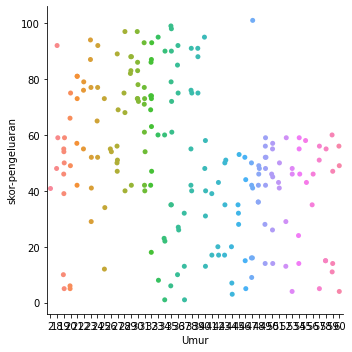

In [91]:
p = sns.catplot(x="Umur",y='skor-pengeluaran',data=df)

Dapat dilihat pada hasil plot di atas, skor-pengeluaran dipengaruhi oleh umur.
Kemudian, terlihat terdapat noise yang skor-pengeluarannya diatas 100 yaitu 101. Sehingga noise tersebut akan di hapus


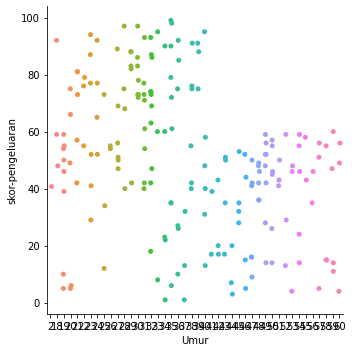

In [92]:
#Noise pada data sudah dihapus
df.drop(df.index[df['skor-pengeluaran']==101],inplace=True)
p = sns.catplot(x="Umur",y='skor-pengeluaran',data=df)

Akan dilakukan perbandingan antara kolom pendapatan perbulan dengan kolom skor-pengeluaran

Dapat dilihat dari plot tersebut, tidak terdapat hubungan antra pendapatan perbulan dengan skor-pengeluaran

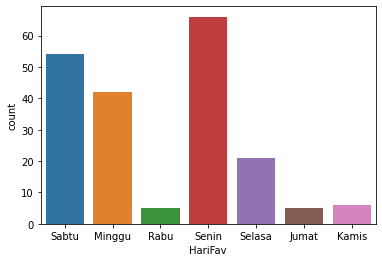

In [93]:
sns.countplot(x='HariFav',data=df)

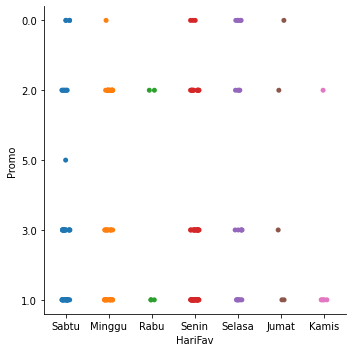

In [94]:
sns.catplot(x='HariFav',y='Promo',data=df)

Dari grafik pertama terlihat bahwa jumlah penggunaan loyalty di hari Rabu termasuk yang paling sedikit, tapi selalu terdapat penggunaan promo di hari Rabu untuk range jarang dan sedang. Oleh karena itu, kami merekomendasikan untuk menambahkan promo khusus di hari Rabu agar menambah pembeli di hari tersebut.

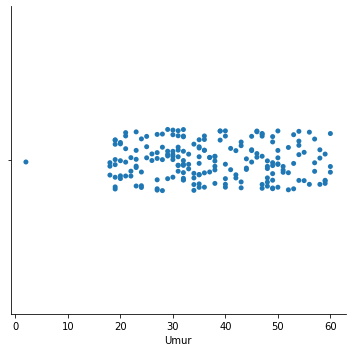

In [95]:
#Melihat range umur yang cenderung datang
sns.catplot(x='Umur',data=df)

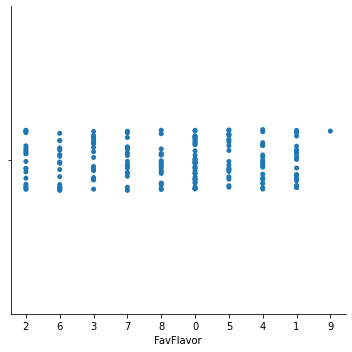

In [96]:
#Melihat range umur yang cenderung datang
sns.catplot(x='FavFlavor',data=df)

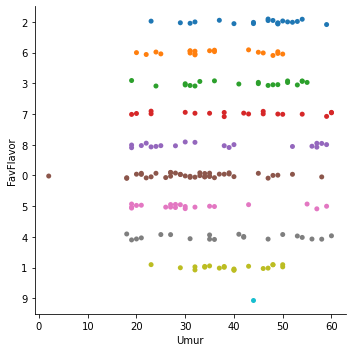

In [97]:
sns.catplot(x='Umur', y='FavFlavor',data=df)

Biar pun range umur cenderung tersebar secara rata, umur 20-40 cenderung mendominasi. pelanggan berumur 20-40 memiliki kecenderungan untuk membeli eskrim rasa vanilla.
Maka kami merekomendasikan untuk memberikan promo pada es krim dengan flavor vanilla.

# Clustering

In [98]:
X = df[['Umur','Pendapatan-per-bulan','skor-pengeluaran']].values
C = df[['Jenis Kelamin','Menikah','Kota','Promo','HariFav','FavFlavor']].values
print(X.shape)
df.sample(7)


(199, 3)


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
50,151,Pria,49,19262295,56,1,Jakarta,1.0,Sabtu,6
49,150,Wanita,34,17622950,60,1,Jakarta,1.0,Senin,1
166,267,Wanita,30,25819672,78,1,Depok,1.0,Sabtu,5
8,109,Wanita,32,13524590,47,1,Jakarta,2.0,Selasa,6
22,123,Pria,59,11475409,60,1,Jakarta,1.0,Sabtu,2
140,241,Wanita,50,21311475,57,1,Jakarta,1.0,Sabtu,1
104,205,Wanita,54,5327868,14,1,Tangerang,3.0,Sabtu,4


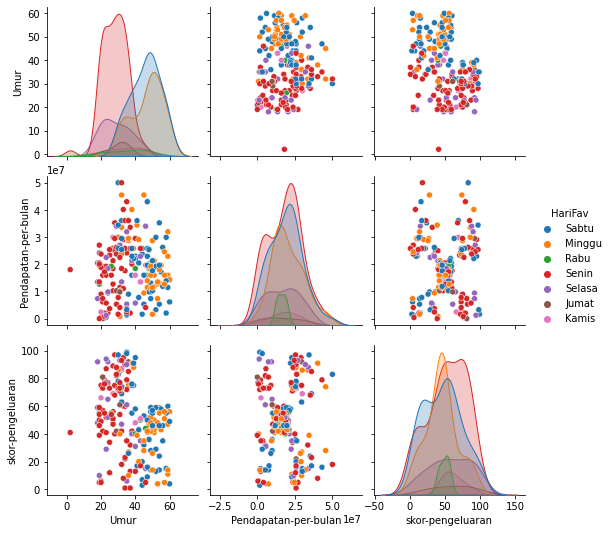

In [99]:
g = sns.pairplot(df, hue="HariFav")

Text(0.5, 1.0, 'Elbow curve')

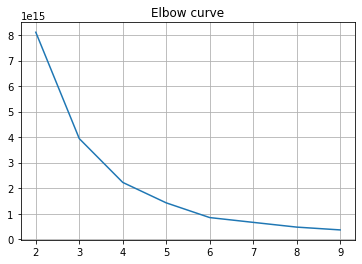

In [100]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
  kmeans = cluster.KMeans(n_clusters=k).fit(X)
  distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

Dari hasil plot tersebut, terlihat jumlah cluster yang optimal adalah 5

array([1, 0, 4, 1, 4, 2, 4, 3, 1, 4], dtype=int32)

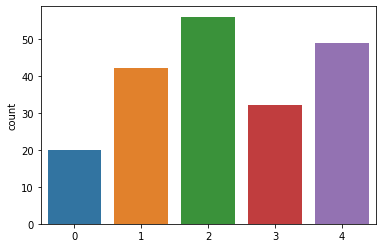

In [101]:
#Kmeans ++
k=5
random_state=99
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, 
                      random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)
sns.countplot(C_kmpp)
C_kmpp[:10]

In [102]:
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


In [103]:
df1 = df.drop(["ID"],axis=1)
df1 = df1.drop(["Menikah"],axis=1)
df1 = df1.drop(["Promo"],axis=1)
df1 = df1.drop(["HariFav"],axis=1)
df1 = df1.drop(["Kota"],axis=1)
df1 = df1.drop(["FavFlavor"],axis=1)


df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Jenis Kelamin         199 non-null    object
 1   Umur                  199 non-null    int64 
 2   Pendapatan-per-bulan  199 non-null    int64 
 3   skor-pengeluaran      199 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.9+ KB


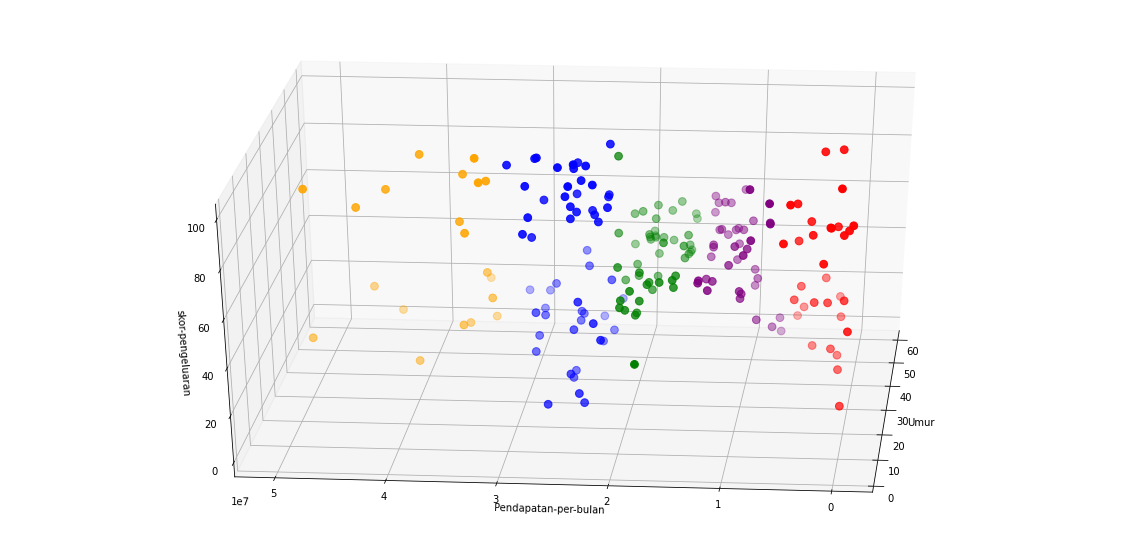

In [104]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df1.iloc[:,1:])
df1["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Umur[df1.label == 0], df1["Pendapatan-per-bulan"][df1.label == 0], df1["skor-pengeluaran"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Umur[df1.label == 1], df1["Pendapatan-per-bulan"][df1.label == 1], df1["skor-pengeluaran"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Umur[df1.label == 2], df1["Pendapatan-per-bulan"][df1.label == 2], df1["skor-pengeluaran"][df1.label == 2], c='green', s=60)
ax.scatter(df1.Umur[df1.label == 3], df1["Pendapatan-per-bulan"][df1.label == 3], df1["skor-pengeluaran"][df1.label == 3], c='orange', s=60)
ax.scatter(df1.Umur[df1.label == 4], df1["Pendapatan-per-bulan"][df1.label == 4], df1["skor-pengeluaran"][df1.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Umur")
plt.ylabel("Pendapatan-per-bulan")
ax.set_zlabel('skor-pengeluaran')
plt.show()


Terlihat dari 3D plot tersebut, target pasar utama MixItUp adalah kalangan menengah kebawah.